<a href="https://colab.research.google.com/github/E-girgen/Thesis-Data-Science-Society/blob/main/RobBERT_Not_preprocced_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/"
%cd "/content/drive/MyDrive/Colab Notebooks"

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
data = pd.read_csv("Tweets.txt", sep = "\t")



In [ ]:
data = data.drop(['Valence', 'Arousal', 'Dominance'], axis=1)
data


,ID,Text,Category
0,4,@LINDAnieuws Maandagmorgen en extra druk😣Dat i...,anger
1,7,@9Owen1 Echt...zweet en shag..en dat een hele ...,anger
2,8,@ohzitdatzo @telegraaf @VVD D66Pechtold zei 1e...,anger
3,11,@PostNL heeft mijn pakket om 17.02 bezorgd all...,anger
4,15,Na premiestijging ziektekosten en pensioen dit...,anger
...,...,...,...
995,949,@interessamt Jammer dit😩voor ons zijn jullie w...,sadness
996,951,@aamberrmm ik😩HAHSH,sadness
997,963,@sarahelbihel Pff ik ben ook ziek echt stommm😢...,sadness
998,976,wow wat n heftig nieuws zeg😢ik wens je heel ve...,sadness


In [ ]:
nd= data.copy()

In [ ]:
#install packages
!pip install transformers
!pip install datasets
!pip install scikit-plot
!pip install --upgrade accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.4 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
from transformers import InputExample, InputFeatures
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("pdelobelle/robbert-v2-dutch-base")


tokenizer_config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/733k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/383k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.12M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
def process_data(row):
    text = row['Text']
    text = str(text)
    text = ' '.join(text.split())

    encodings = tokenizer(text, padding=True, truncation=True, max_length=128)

    emotion = row['Category']

    if emotion == 'anger':
        label = 0
    elif emotion == 'fear':
        label = 1
    elif emotion == 'joy':
        label = 2
    elif emotion == 'love':
        label = 3
    elif emotion == 'neutral':
        label = 4
    elif emotion == 'sadness':
        label = 5

    encodings['label'] = label
    encodings['text'] = text

    return encodings




In [ ]:
processed_data = []

for i in range(len(nd)):
    processed_data.append(process_data(nd.iloc[i]))

new_nd = pd.DataFrame(processed_data)

In [ ]:
from sklearn.model_selection import KFold
import pandas as pd
import pyarrow as pa
from datasets import Dataset

with reduceLRonPLateau

In [ ]:
from sklearn.model_selection import KFold
from transformers import AutoModelForSequenceClassification, AdamW, TrainingArguments, Trainer
from datasets import Dataset
import numpy as np
import torch
from torch.optim.lr_scheduler import ReduceLROnPlateau
from transformers import TrainerCallback, TrainerState, TrainerControl

# Definieer een callback om ReduceLROnPlateau te gebruiken
class ReduceOnPlateauCallback(TrainerCallback):
    def __init__(self, optimizer, scheduler):
        self.optimizer = optimizer
        self.scheduler = scheduler

    def on_evaluate(self, args, state, control, **kwargs):
        # Ophalen van de evaluatie loss uit de logs
        logs = kwargs.get('logs', {})
        eval_loss = logs.get('eval_loss', None)
        # Pas de scheduler aan als er een eval_loss is
        if eval_loss is not None:
            self.scheduler.step(eval_loss)
            # Log de huidige learning rate
            for i, group in enumerate(self.optimizer.param_groups):
                print(f"Learning rate van groep {i}: {group['lr']}")

# Definieer K-Fold
kf = KFold(n_splits=10, shuffle=True, random_state=2022)

# Veronderstel dat new_nd en tokenizer eerder gedefinieerd zijn
for fold, (train_idx, valid_idx) in enumerate(kf.split(new_nd)):
    # Maak train en validation datasets
    train_df, valid_df = new_nd.iloc[train_idx], new_nd.iloc[valid_idx]
    train_dataset = Dataset.from_pandas(train_df)
    valid_dataset = Dataset.from_pandas(valid_df)

    # Laad het vooraf getrainde model
    model = AutoModelForSequenceClassification.from_pretrained(
        "pdelobelle/robbert-v2-dutch-base",
        num_labels=6
    )

    # Pas de modelconfiguratie aan
    model.config.hidden_size = 2048
    model.config.hidden_dropout_prob = 0.2
    model.config.max_position_embeddings = 64

    # Definieer de optimizer
    optimizer = AdamW(model.parameters(), lr=5e-5)

    # Definieer de scheduler
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=3)

    # Definieer TrainingArguments
    training_args = TrainingArguments(
        output_dir=f'./results/fold_{fold}',
        num_train_epochs=5,
        per_device_train_batch_size=64,
        per_device_eval_batch_size=128,
        warmup_steps=100,
        weight_decay=0.01,
        logging_dir=f'./logs/fold_{fold}',
        logging_steps=10,
        evaluation_strategy="epoch"
    )

    # Initialiseer de Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=valid_dataset,
        tokenizer=tokenizer,
        optimizers=(optimizer, None)  # Pas de optimizer en scheduler aan
    )

    # Voeg de callback toe voor de ReduceLROnPlateau scheduler
    trainer.add_callback(ReduceOnPlateauCallback(optimizer, scheduler))

    # Train het model
    trainer.train()

    # Evalueer het model
    trainer.evaluate()


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,1.902100,1.720029
2,1.536500,1.593409
3,1.509100,1.535740
4,1.348100,1.524319
5,1.280200,1.439028


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.742700,1.592978
2,1.520700,1.433870
3,1.539400,1.349729
4,1.404000,1.279747
5,1.317900,1.436198


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.734400,1.628398
2,1.516500,1.542287
3,1.529000,1.489491
4,1.352200,1.382752
5,1.300800,1.332771


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.733600,1.588560
2,1.536900,1.524445
3,1.516000,1.501115
4,1.395300,1.402617
5,1.292000,1.329407


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.733300,1.554011
2,1.533300,1.432638
3,1.534500,1.415325
4,1.380700,1.329696
5,1.322600,1.336407


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.737400,1.595733
2,1.537000,1.491467
3,1.529500,1.456359
4,1.382400,1.374615
5,1.300600,1.433143


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.731600,1.587752
2,1.576000,1.498432
3,1.521600,1.470589
4,1.384500,1.385386
5,1.308900,1.335706


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.739900,1.627055
2,1.516900,1.564053
3,1.523400,1.501493
4,1.388200,1.370927
5,1.320300,1.427648


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.731600,1.674765
2,1.495500,1.630417
3,1.498100,1.588839
4,1.372400,1.432299
5,1.305100,1.531306


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.738100,1.615184
2,1.513600,1.570124
3,1.526700,1.510251
4,1.384600,1.434909
5,1.293600,1.540645


In [ ]:
from sklearn.model_selection import KFold
from transformers import AutoModelForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from datasets import Dataset
from transformers import TrainingArguments, Trainer

# Definieer K-Fold
kf = KFold(n_splits=10, shuffle=True, random_state=2022)

# Loop over de 10 folds
for fold, (train_idx, valid_idx) in enumerate(kf.split(new_nd)):
    train_df, valid_df = new_nd.iloc[train_idx], new_nd.iloc[valid_idx]

    train_hg = Dataset.from_pandas(train_df)
    valid_hg = Dataset.from_pandas(valid_df)

    model = AutoModelForSequenceClassification.from_pretrained(
        "pdelobelle/robbert-v2-dutch-base",
        num_labels=6
    )

    model.config.hidden_size = 2048
    model.config.hidden_dropout_prob = 0.2
    model.config.max_position_embeddings = 64

    # Definieer de optimizer (AdamW) met de gespecificeerde leersnelheid
    optimizer = AdamW(model.parameters(), lr=5e-5)

    # Definieer de learning rate scheduler (ReduceLROnPlateau)
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=100, num_training_steps=len(train_hg) // 64 * 10)

    # Controleer of de kolomnamen overeenkomen met wat het model verwacht
    # Pas deze aan op basis van de uitvoer van je tokenizer (bijvoorbeeld 'input_ids', 'attention_mask', enz.)
    training_args = TrainingArguments(
        output_dir=f'./results/fold_{fold}',
        num_train_epochs=5,
        per_device_train_batch_size=64,
        per_device_eval_batch_size=128,
        warmup_steps=100,
        weight_decay=0.01,
        logging_dir=f'./logs/fold_{fold}',
        logging_steps=5,
        evaluation_strategy="epoch"
    )

    trainer_bertje = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_hg,
        eval_dataset=valid_hg,
        tokenizer=tokenizer
    )

    # Train het model
    trainer_bertje.train()

    # Optioneel: Voer evaluatie uit op een aparte testset of validerende set
    trainer_bertje.evaluate()


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,1.689400,1.660691
2,1.482300,1.570782
3,1.617500,1.527043
4,1.241000,1.519252
5,1.240300,1.467195


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.702700,1.576822
2,1.479000,1.422518
3,1.634900,1.344444
4,1.329000,1.279733
5,1.221800,1.386533


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.719700,1.614966
2,1.491400,1.534900
3,1.626400,1.481464
4,1.229500,1.357116
5,1.186300,1.344459


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.736900,1.576870
2,1.516300,1.520055
3,1.618300,1.495821
4,1.325600,1.385146
5,1.128200,1.322309


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.703700,1.535244
2,1.494300,1.432272
3,1.658000,1.400877
4,1.328200,1.299050
5,1.165300,1.368040


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.707200,1.580642
2,1.512000,1.486883
3,1.616700,1.449179
4,1.320900,1.364900
5,1.257600,1.421072


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.739700,1.571140
2,1.585500,1.499330
3,1.627200,1.457044
4,1.309000,1.359525
5,1.294300,1.337009


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.698600,1.615462
2,1.488000,1.555987
3,1.523900,1.494727
4,1.325000,1.352300
5,1.154900,1.388600


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.698600,1.663302
2,1.442300,1.627966
3,1.640700,1.578809
4,1.294300,1.420985
5,1.173400,1.378811


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.706800,1.606893
2,1.473800,1.560883
3,1.560700,1.512036
4,1.311200,1.435189
5,1.124300,1.446660


In [ ]:
trainer_bertje.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss
1,1.754600,1.677088
2,1.529400,1.522223
3,1.546300,1.463657
4,1.370700,1.446638
5,1.221600,1.414937


TrainOutput(global_step=65, training_loss=1.4842970261206994, metrics={'train_runtime': 31.983, 'train_samples_per_second': 125.066, 'train_steps_per_second': 2.032, 'total_flos': 93374889152256.0, 'train_loss': 1.4842970261206994, 'epoch': 5.0})

In [ ]:
trainer_bertje.evaluate()

{'eval_loss': 1.446660041809082,
 'eval_runtime': 0.1194,
 'eval_samples_per_second': 837.581,
 'eval_steps_per_second': 8.376,
 'epoch': 5.0}

In [ ]:
import numpy as np

# Make predictions
predictions = trainer.predict(valid_dataset)

# Extract predicted labels from logits
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Access true labels from the validation dataset
true_labels = valid_dataset['label']

# Now, you have both true_labels and predicted_labels


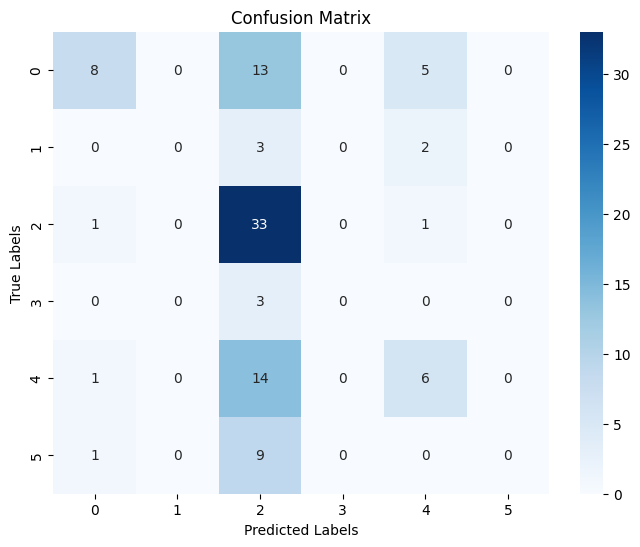

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=[0, 1, 2, 3, 4, 5], yticklabels=[0, 1, 2, 3, 4, 5])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(true_labels, predicted_labels)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.73      0.31      0.43        26
           1       0.00      0.00      0.00         5
           2       0.44      0.94      0.60        35
           3       0.00      0.00      0.00         3
           4       0.43      0.29      0.34        21
           5       0.00      0.00      0.00        10

    accuracy                           0.47       100
   macro avg       0.27      0.26      0.23       100
weighted avg       0.43      0.47      0.39       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np

# Make predictions
predictions = trainer_bertje.predict(valid_hg)

# Extract predicted labels from logits
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Access true labels from the validation dataset
true_labels = valid_hg['label']

# Now, you have both true_labels and predicted_labels


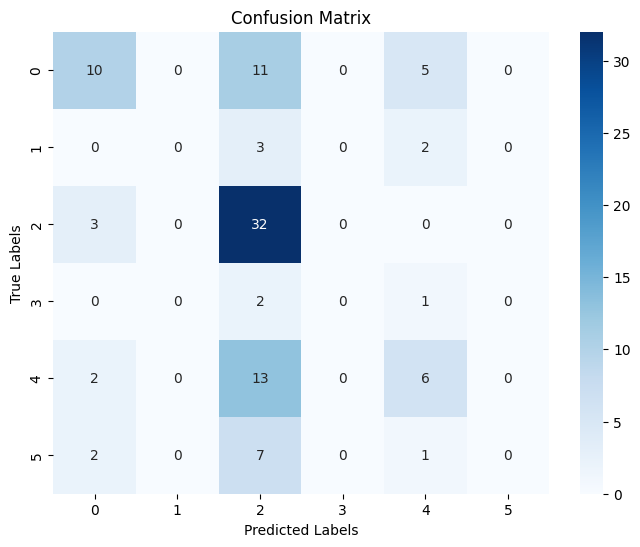

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=[0, 1, 2, 3, 4, 5], yticklabels=[0, 1, 2, 3, 4, 5])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:

from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(true_labels, predicted_labels)

# Print the classification report
print(report)



              precision    recall  f1-score   support

           0       0.59      0.38      0.47        26
           1       0.00      0.00      0.00         5
           2       0.47      0.91      0.62        35
           3       0.00      0.00      0.00         3
           4       0.40      0.29      0.33        21
           5       0.00      0.00      0.00        10

    accuracy                           0.48       100
   macro avg       0.24      0.26      0.24       100
weighted avg       0.40      0.48      0.41       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Calculate and print additional metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

print(f"\nAccuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.48
Precision: 0.2431372549019608
Recall: 0.2641025641025641
F1-Score: 0.23663480595067857


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Extra